In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Load and prepare the dataset
### 1. Load the training data into a dataframe named df_train_data 

In [17]:
df_train_data = pd.read_csv('shuttle.trn', names=[0,1,2,3,4,5,6,7,8,9], delimiter=' ')
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


### 2. Create binary classification problem - rename some class labels


In [46]:
labels = {1:'Rad Flow',
          2:'Fpv Close',
          3:'Fpv Open',
          4:'High',
          5:'Bypass',
          6:'Bpv Close',
          7:'Bpv Open'}
df_train_data2 = df_train_data.copy()
df_train_data2[9] = df_train_data2[9].map(labels)
df_train_data2.rename(columns={9:'labels'},inplace=True)
df_train_data2

,0,1,2,3,4,5,6,7,8,labels
0,50,21,77,0,28,0,27,48,22,Fpv Close
1,55,0,92,0,0,26,36,92,56,High
2,53,0,82,0,52,-5,29,30,2,Rad Flow
3,37,0,76,0,28,18,40,48,8,Rad Flow
4,37,0,79,0,34,-26,43,46,2,Rad Flow
...,...,...,...,...,...,...,...,...,...,...
43495,46,5,78,0,46,5,32,32,0,Rad Flow
43496,37,0,79,-1,10,3,43,69,26,Rad Flow
43497,48,0,78,3,46,0,30,32,2,Rad Flow
43498,41,0,79,0,38,-25,38,40,2,Rad Flow


### 3. Create a dataframe of 9 features named X, drop column 9.

In [48]:
X = df_train_data2.drop(columns=['labels'])
X.head()

,0,1,2,3,4,5,6,7,8
0,50,21,77,0,28,0,27,48,22
1,55,0,92,0,0,26,36,92,56
2,53,0,82,0,52,-5,29,30,2
3,37,0,76,0,28,18,40,48,8
4,37,0,79,0,34,-26,43,46,2


### 4. Create a data frame of labels named y, select only column 9.


In [49]:
y = df_train_data2.labels
y.head()

0    Fpv Close
1         High
2     Rad Flow
3     Rad Flow
4     Rad Flow
Name: labels, dtype: object

### 5. Split the data into a training set and a test set.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create the model
### 1. Instantiate a Logistic Regression classifier with a lbfgs solver.


In [58]:
logit = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2. Fit the classifier to the data.

In [59]:
logit.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Calculate Accuracy
### Calculate and print the accuracy of the model on the test data.

In [76]:
logit.score(X_test_scaled, y_test)

0.9693793103448276

# Dummy Classifier
### Use the dummy classifier to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

In [65]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train_scaled, y_train)
dummy_predictions = dummy.predict(X_test_scaled)
print(classification_report(y_test, dummy_predictions))

              precision    recall  f1-score   support

   Bpv Close       0.00      0.00      0.00         1
    Bpv Open       0.00      0.00      0.00         2
      Bypass       0.00      0.00      0.00       619
   Fpv Close       0.00      0.00      0.00         7
    Fpv Open       0.00      0.00      0.00        30
        High       0.00      0.00      0.00      1716
    Rad Flow       0.78      1.00      0.88      8500

    accuracy                           0.78     10875
   macro avg       0.11      0.14      0.13     10875
weighted avg       0.61      0.78      0.69     10875



/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix
### Print the confusion matrix.

In [67]:
confusion_matrix(y_test, test_predictions)

array([[   1,    0,    0,    0,    0,    0,    0],
       [   0,    2,    0,    0,    0,    0,    0],
       [   0,    0,  619,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    7,    0],
       [   0,    0,    3,    0,    2,    7,   18],
       [   1,    0,    1,    0,    0, 1525,  189],
       [   0,    0,    1,    0,    0,  106, 8393]])

# Plot a nicer confusion matrix (optional)
### Use the plot_confusion_matrix function to plot a nicer looking confusion matrix.

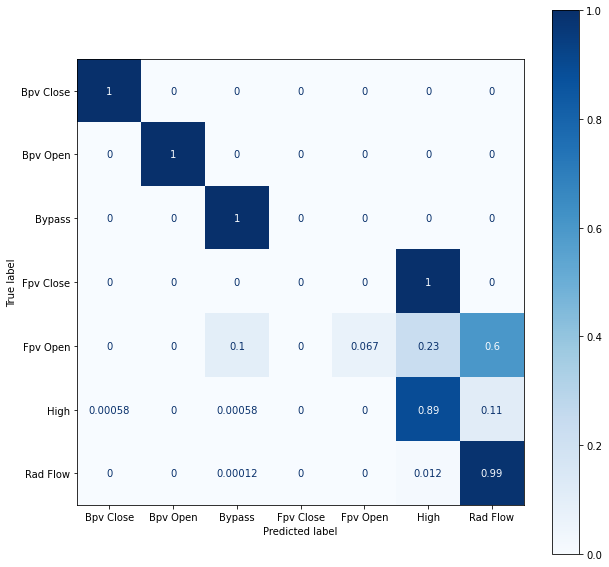

In [75]:
fig, ax = plt.subplots(figsize=[10,10])
plot = plot_confusion_matrix(logit, X_test_scaled, y_test, cmap='Blues', normalize='true', ax=ax)
plt.show()

# Calculate Metrics

In [77]:
test_predictions = logit.predict(X_test_scaled)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

   Bpv Close       0.50      1.00      0.67         1
    Bpv Open       1.00      1.00      1.00         2
      Bypass       0.99      1.00      1.00       619
   Fpv Close       0.00      0.00      0.00         7
    Fpv Open       1.00      0.07      0.12        30
        High       0.93      0.89      0.91      1716
    Rad Flow       0.98      0.99      0.98      8500

    accuracy                           0.97     10875
   macro avg       0.77      0.71      0.67     10875
weighted avg       0.97      0.97      0.97     10875



/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plot ROC Curve and AUC
### Caculate AUC and plot the curve.

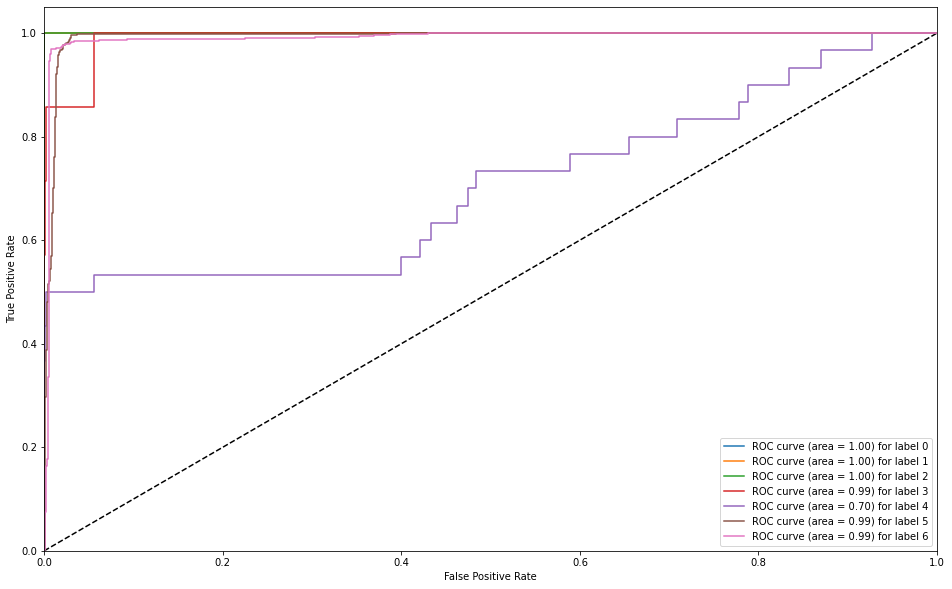

In [81]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    plt.show()

plot_multiclass_roc(logit, X_test_scaled, y_test, n_classes=7, figsize=(16, 10))

# Plot Precision-Recall Curve
### Plot the precision-recall curve for the model above.

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

Training score c=0.05: 0.9581609195402299
Test score c=0.05: 0.9591724137931035
Training score c=0.55: 0.9655785440613027
Test score c=0.55: 0.9680919540229885
Training score c=1.05: 0.9661609195402299
Test score c=1.05: 0.9691954022988506
Training score c=1.5: 0.9664980842911878
Test score c=1.5: 0.9695632183908046


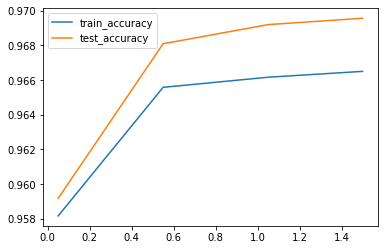

In [83]:
params = {'solver':'lbfgs', 
          'penalty':'l2', 
          'max_iter':1000, 
          'random_state':55,
          'C':0}

c_params = [0.05, 0.55, 1.05, 1.5]
test_accuracy = []
train_accuracy = []
for c in c_params:
    params['C'] = c
    lr = LogisticRegression(**params)
    lr.fit(X_train_scaled, y_train)
    train_accuracy.append(lr.score(X_train_scaled, y_train))
    test_accuracy.append(lr.score(X_test_scaled,y_test))
    print(f'Training score c={c}: {lr.score(X_train_scaled, y_train)}')
    print(f'Test score c={c}: {lr.score(X_test_scaled,y_test)}')
    
plt.plot(c_params, train_accuracy)
plt.plot(c_params, test_accuracy)
plt.legend(['train_accuracy','test_accuracy'])

# Cross Validation
### Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.

In [86]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(logit, X_train_scaled, y_train, cv=5, scoring='neg_log_loss')
print(cv)
print(f'Mean cv score: {cv.mean()}')

[-0.1274496  -0.11572964 -0.10436438 -0.12776888 -0.12021701]
Mean cv score: -0.1191059013025727


# Is this really linear?
Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?

In [87]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [88]:
knn.score(X_test_scaled, y_test)

0.9977931034482759

In [90]:
test_predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

   Bpv Close       0.25      1.00      0.40         1
    Bpv Open       1.00      1.00      1.00         2
      Bypass       1.00      1.00      1.00       619
   Fpv Close       1.00      0.71      0.83         7
    Fpv Open       0.77      0.77      0.77        30
        High       1.00      1.00      1.00      1716
    Rad Flow       1.00      1.00      1.00      8500

    accuracy                           1.00     10875
   macro avg       0.86      0.92      0.86     10875
weighted avg       1.00      1.00      1.00     10875



# Random Forest
Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9977931034482759

In [92]:
test_predictions = rf.predict(X_test_scaled)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

   Bpv Close       0.00      0.00      0.00         1
    Bpv Open       1.00      1.00      1.00         2
      Bypass       1.00      1.00      1.00       619
   Fpv Close       1.00      1.00      1.00         7
    Fpv Open       1.00      1.00      1.00        30
        High       1.00      1.00      1.00      1716
    Rad Flow       1.00      1.00      1.00      8500

    accuracy                           1.00     10875
   macro avg       0.86      0.86      0.86     10875
weighted avg       1.00      1.00      1.00     10875



/Users/abilenky/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
